In [39]:

import subprocess
import numpy as np
import pandas as pd
import os

In [40]:
spark_version = 'spark-3.1.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [41]:
dfUrls = pd.read_csv("urls_to_get.csv")
dfUrls.head()

,urls
0,https://s3.amazonaws.com/tripdata/201901-citib...
1,https://s3.amazonaws.com/tripdata/201902-citib...
2,https://s3.amazonaws.com/tripdata/201903-citib...
3,https://s3.amazonaws.com/tripdata/201904-citib...
4,https://s3.amazonaws.com/tripdata/201905-citib...


# New Section

# New Section

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
for i,row in dfUrls.iterrows():
  print(row['urls'])
  subprocess.run(['wget',row['urls']])
  subprocess.run(['unzip',row['urls'].split("/")[-1]])

https://s3.amazonaws.com/tripdata/201901-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201902-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201903-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201904-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201905-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201906-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201907-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201908-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201909-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201910-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201911-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201912-citibike-tripdata.csv.zip


In [44]:
result = subprocess.run(["ls"],capture_output=True,text=True)
print(result.stdout)

201901-citibike-tripdata.csv
201901-citibike-tripdata.csv.zip
201901-citibike-tripdata.csv.zip.1
201901-citibike-tripdata.csv.zip.2
201902-citibike-tripdata.csv
201902-citibike-tripdata.csv.zip
201902-citibike-tripdata.csv.zip.1
201902-citibike-tripdata.csv.zip.2
201903-citibike-tripdata.csv
201903-citibike-tripdata.csv.zip
201903-citibike-tripdata.csv.zip.1
201903-citibike-tripdata.csv.zip.2
201904-citibike-tripdata.csv
201904-citibike-tripdata.csv.zip
201904-citibike-tripdata.csv.zip.1
201904-citibike-tripdata.csv.zip.2
201905-citibike-tripdata.csv
201905-citibike-tripdata.csv.zip
201905-citibike-tripdata.csv.zip.1
201905-citibike-tripdata.csv.zip.2
201906-citibike-tripdata.csv
201906-citibike-tripdata.csv.zip
201906-citibike-tripdata.csv.zip.1
201906-citibike-tripdata.csv.zip.2
201907-citibike-tripdata.csv
201907-citibike-tripdata.csv.zip
201907-citibike-tripdata.csv.zip.1
201907-citibike-tripdata.csv.zip.2
201908-citibike-tripdata.csv
201908-citibike-tripdata.csv.zip
201908-citibik

In [45]:
df = pd.read_csv("201903-citibike-tripdata.csv")
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1463,2019-03-01 00:00:16.0970,2019-03-01 00:24:39.3880,319.0,Fulton St & Broadway,40.711066,-74.009447,347.0,Greenwich St & W Houston St,40.728846,-74.008591,35618,Subscriber,1989,1
1,285,2019-03-01 00:00:32.3850,2019-03-01 00:05:18.1830,439.0,E 4 St & 2 Ave,40.726281,-73.989780,150.0,E 2 St & Avenue C,40.720874,-73.980858,31113,Subscriber,1980,1
2,686,2019-03-01 00:00:47.7970,2019-03-01 00:12:14.3090,526.0,E 33 St & 5 Ave,40.747659,-73.984907,3474.0,6 Ave & Spring St,40.725256,-74.004121,19617,Subscriber,1987,1
3,442,2019-03-01 00:01:01.2090,2019-03-01 00:08:23.7510,3474.0,6 Ave & Spring St,40.725256,-74.004121,355.0,Bayard St & Baxter St,40.716021,-73.999744,27086,Subscriber,1987,2
4,2913,2019-03-01 00:01:09.2810,2019-03-01 00:49:42.3810,379.0,W 31 St & 7 Ave,40.749156,-73.991600,212.0,W 16 St & The High Line,40.743349,-74.006818,34791,Subscriber,1991,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327955,351,2019-03-31 23:59:30.5850,2019-04-01 00:05:21.7850,3747.0,E 84 St & 3 Ave,40.777554,-73.955128,3351.0,E 102 St & 1 Ave,40.786995,-73.941648,37290,Subscriber,1985,1
1327956,1943,2019-03-31 23:59:55.3410,2019-04-01 00:32:18.6920,450.0,W 49 St & 8 Ave,40.762272,-73.987882,515.0,W 43 St & 10 Ave,40.760094,-73.994618,34220,Subscriber,1987,1
1327957,515,2019-03-31 23:59:50.1810,2019-04-01 00:08:25.8330,3542.0,Amsterdam Ave & W 119 St,40.808625,-73.959621,3543.0,Morningside Dr & Amsterdam Ave,40.810285,-73.957365,37863,Subscriber,1988,1
1327958,660,2019-03-31 23:59:56.6520,2019-04-01 00:10:57.3760,3434.0,W 88 St & West End Ave,40.790254,-73.977183,3538.0,W 110 St & Amsterdam Ave,40.802692,-73.962950,36103,Subscriber,1987,1


In [50]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.327960e+06,1.327950e+06,1.327960e+06,1.327960e+06,1.327950e+06,1.327960e+06,1.327960e+06,1.327960e+06,1.327960e+06,1.327960e+06
mean,8.826577e+02,1.667907e+03,4.073775e+01,-7.398195e+01,1.657309e+03,4.073754e+01,-7.398215e+01,2.989439e+04,1.979394e+03,1.167327e+00
std,8.571482e+03,1.470691e+03,3.055766e-02,1.887059e-02,1.469614e+03,3.038467e-02,1.891760e-02,6.644938e+03,1.220166e+01,4.971202e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.401713e+01,7.200000e+01,4.065540e+01,-7.404399e+01,1.452900e+04,1.857000e+03,0.000000e+00
25%,3.210000e+02,3.850000e+02,4.071882e+01,-7.399462e+01,3.830000e+02,4.071882e+01,-7.399468e+01,2.648400e+04,1.969000e+03,1.000000e+00
50%,5.390000e+02,5.150000e+02,4.073913e+01,-7.398474e+01,5.140000e+02,4.073913e+01,-7.398516e+01,3.183800e+04,1.982000e+03,1.000000e+00
75%,9.440000e+02,3.295000e+03,4.075763e+01,-7.397188e+01,3.293000e+03,4.075725e+01,-7.397208e+01,3.522800e+04,1.989000e+03,1.000000e+00
max,2.969781e+06,3.749000e+03,4.086300e+01,-7.388100e+01,3.749000e+03,4.086300e+01,-7.388100e+01,3.796400e+04,2.003000e+03,2.000000e+00


In [51]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [52]:
df.usertype

0          Subscriber
1          Subscriber
2          Subscriber
3          Subscriber
4          Subscriber
              ...    
1327955    Subscriber
1327956    Subscriber
1327957    Subscriber
1327958    Subscriber
1327959    Subscriber
Name: usertype, Length: 1327960, dtype: object

In [96]:
user_t = df.usertype.value_counts()
user_t

Subscriber    1221302
Customer       106658
Name: usertype, dtype: int64

In [82]:
gender_unique = df["gender"].unique()
gender_unique

array([1, 2, 0])

In [66]:
df.gender.value_counts()


1    962603
2    293780
0     71577
Name: gender, dtype: int64

In [72]:
df.bikeid.value_counts()

35641    545
36624    503
36696    497
36102    494
35737    487
        ... 
33863      1
37957      1
28294      1
37959      1
19788      1
Name: bikeid, Length: 13966, dtype: int64

In [80]:
birthday_user_u = df["birth year"].unique()
birthday_user_u

array([1989, 1980, 1987, 1991, 1986, 1974, 1985, 1995, 1982, 1977, 1971,
       1963, 1994, 1976, 1979, 1993, 1988, 1962, 1999, 1967, 1981, 1992,
       1984, 1972, 1990, 1983, 1996, 1997, 1970, 2000, 1965, 1978, 1960,
       1968, 1966, 1959, 1969, 1964, 1975, 1956, 1950, 1961, 1998, 1900,
       1942, 1958, 1954, 1955, 1973, 2001, 1952, 1953, 1957, 1951, 1944,
       1949, 1948, 1947, 1945, 1901, 2002, 1899, 1939, 1946, 1936, 1943,
       1941, 1938, 1896, 1937, 1916, 1940, 1886, 1921, 1924, 1888, 1895,
       2003, 1933, 1857, 1935, 1887, 1897, 1910, 1934, 1928, 1890, 1907,
       1930, 1912, 1932, 1917, 1920, 1931, 1919, 1918, 1894, 1911, 1923,
       1909, 1889, 1885, 1929, 1927, 1906])

In [78]:
birthday_user = df["birth year"].value_counts()
birthday_user

1969    84464
1989    53341
1990    52939
1988    51929
1991    51699
        ...  
1911        4
1920        3
1931        2
1906        1
1929        1
Name: birth year, Length: 105, dtype: int64

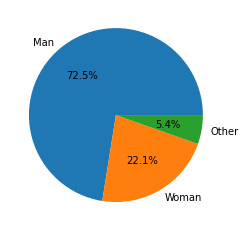

In [93]:
import matplotlib.pyplot as plt
counts = df.gender.value_counts()
plt.pie(counts.values,labels=["Man","Woman","Other"],autopct='%1.1f%%')
plt.show()

([<matplotlib.patches.Wedge at 0x7fb691d88090>,
 [Text(-0.29958596049523595, -1.1620018297206536, 'Subscriber'),
  Text(0.2746205385834926, 1.065168324626729, 'Customer')],
 [Text(-0.17475847695555427, -0.6778344006703813, '91.97%'),
  Text(0.1497930210455414, 0.581000904341852, '8.03%')])

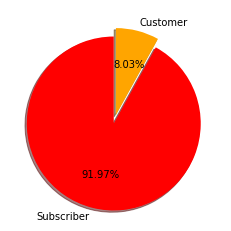

In [97]:
explode = (0.1, 0)
colors = ["red", "orange"]
plt.pie(user_t, explode=explode, labels=["Subscriber", "Customer"], colors=colors,autopct="%1.2f%%", shadow=True, startangle=90)
        